<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Normalization Techniques**


Estimated time needed: **30** minutes


In this lab, you will focus on data normalization. This includes identifying compensation-related columns, applying normalization techniques, and visualizing the data distributions.


## Objectives


In this lab, you will perform the following:


- Identify duplicate rows and remove them.

- Check and handle missing values in key columns.

- Identify and normalize compensation-related columns.

- Visualize the effect of normalization techniques on data distributions.


-----


## Hands on Lab


#### Step 1: Install and Import Libraries


In [5]:
!pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 89.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 93.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 40.1 MB/s eta 0:00:00


In [101]:
!pip install matplotlib
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 27.4 MB/s eta 0:00:00


In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2: Load the Dataset into a DataFrame


We use the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.


The functions below will download the dataset into your browser:


In [145]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)

# Display the first few rows to check if data is loaded correctly
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

In [146]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")

In [147]:
from IPython.display import HTML, display
def analyze_column_stats(df):
    """
    Displays detailed statistics including zero value counts
    Returns: Dictionary of statistics for each column type
    """
    stats = {'numeric': {}, 'categorical': {}}
    
    # Handle numeric columns
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    for col in numeric_cols:
        zero_count = (df[col] == 0).sum()
        non_zero_mean = df[col][df[col] != 0].mean()
        stats['numeric'][col] = {
            'mean': df[col].mean(),
            'non_zero_mean': non_zero_mean,
            'median': df[col].median(),
            'mode': df[col].mode()[0],
            'missing': df[col].isna().sum(),
            'zeros': zero_count,
            'total': len(df[col])
        }
    
    # Handle categorical columns
    cat_cols = df.select_dtypes(include=['object']).columns
    for col in cat_cols:
        stats['categorical'][col] = {
            'mode': df[col].mode()[0],
            'unique_values': df[col].nunique(),
            'missing': df[col].isna().sum(),
            'total': len(df[col])
        }
    
    # Display with HTML formatting
    #html_content = create_html_display(stats)  # Using previous HTML display function
    #display(HTML(html_content))
    
    return stats

def create_html_display(stats):
    html_content = """
    <style>
        .stats-grid {
            display: grid;
            grid-template-columns: repeat(4, 1fr);
            gap: 20px;
            padding: 20px;
        }
        .stat-card {
            border: 1px solid #e0e0e0;
            border-radius: 8px;
            padding: 15px;
            background-color: gray;
        }
        .stat-card h3 {
            color: #1976D2;
            margin-top: 0;
        }
    </style>
    
    <h2 style='color: #2196F3'>Numeric Columns Statistics</h2>
    <div class='stats-grid'>
    """
    
    for col, stat in stats['numeric'].items():
        html_content += f"""
        <div class='stat-card'>
            <h3 style='color: #1976D2'>{col}</h3>
            <ul style='list-style-type: none; padding-left: 0'>
                <li>Mean: <b>${stat['mean']:,.2f}</b></li>
                <li>Non-Zero Mean: <b>${stat['non_zero_mean']:,.2f}</b></li>
                <li>Median: <b>${stat['median']:,.2f}</b></li>
                <li>Mode: <b>${stat['mode']:,.2f}</b></li>
                <li>Zero Values: <b>{stat['zeros']}</b></li>
                <li>Missing Values: <b>{stat['missing']}</b></li>
                <li>Total Values: <b>{stat['total']}</b></li>
            </ul>
        </div>
        """
    html_content += """
    </div>
    <h2 style='color: #2196F3'>Categorical Columns Statistics</h2>
    <div class='stats-grid'>
    """
    
    # Add categorical columns
    for col, stat in stats['categorical'].items():
        html_content += f"""
        <div class='stat-card'>
            <h3>{col}</h3>
            <ul style='list-style-type: none; padding-left: 0'>
                <li>Mode: <b>{stat['mode']}</b></li>
                <li>Unique: <b>{stat['unique_values']}</b></li>
                <li>Missing: <b>{stat['missing']}</b></li>
                <li>Total: <b>{stat['total']}</b></li>
            </ul>
        </div>
        """
    
    html_content += "</div>"
    
    return html_content

# Use the function


In [148]:
def create_html_display(stats, selected_columns=None):
    """
    Creates HTML display for specified columns with enhanced styling
    #f5f5f5;
    """
    html_content = """
    <style>
        .stats-grid {
            display: grid;
            grid-template-columns: repeat(4, 1fr);
            gap: 20px;
            padding: 20px;
        }
        .stat-card {
            border: 1px solid #e0e0e0;
            border-radius: 8px;
            padding: 15px;
            background-color: gray
            transition: transform 0.2s;
        }
        .stat-card:hover {
            transform: scale(1.02);
            background-color: #e8eaf6;
        }
        .stat-card h3 {
            color: #1976D2;
            margin-top: 0;
            border-bottom: 2px solid #1976D2;
            padding-bottom: 5px;
        }
        .stat-value {
            color: #2e7d32;
            font-weight: bold;
        }
    </style>
    """
    
    # Filter columns if specified
    if selected_columns:
        numeric_cols = {k: v for k, v in stats['numeric'].items() if k in selected_columns}
        categorical_cols = {k: v for k, v in stats['categorical'].items() if k in selected_columns}
    else:
        numeric_cols = stats['numeric']
        categorical_cols = stats['categorical']
    
    # Add numeric columns
    if numeric_cols:
        html_content += "<h2 style='color: #1976D2'>Numeric Columns Statistics</h2><div class='stats-grid'>"
        for col, stat in numeric_cols.items():
            html_content += f"""
            <div class='stat-card'>
                <h3>{col}</h3>
                <ul style='list-style-type: none; padding-left: 0'>
                    <li>Mean: <span class='stat-value'>${stat['mean']:,.2f}</span></li>
                    <li>Non-Zero Mean: <span class='stat-value'>${stat['non_zero_mean']:,.2f}</span></li>
                    <li>Median: <span class='stat-value'>${stat['median']:,.2f}</span></li>
                    <li>Mode: <span class='stat-value'>${stat['mode']:,.2f}</span></li>
                    <li>Zero Values: <span class='stat-value'>{stat['zeros']}</span></li>
                    <li>Missing Values: <span class='stat-value'>{stat['missing']}</span></li>
                    <li>Total Values: <span class='stat-value'>{stat['total']}</span></li>
                </ul>
            </div>
            """
        html_content += "</div>"
    
    # Add categorical columns
    if categorical_cols:
        html_content += "<h2 style='color: #1976D2'>Categorical Columns Statistics</h2><div class='stats-grid'>"
        for col, stat in categorical_cols.items():
            html_content += f"""
            <div class='stat-card'>
                <h3>{col}</h3>
                <ul style='list-style-type: none; padding-left: 0'>
                    <li>Mode: <span class='stat-value'>{stat['mode']}</span></li>
                    <li>Unique: <span class='stat-value'>{stat['unique_values']}</span></li>
                    <li>Missing: <span class='stat-value'>{stat['missing']}</span></li>
                    <li>Total: <span class='stat-value'>{stat['total']}</span></li>
                </ul>
            </div>
            """
        html_content += "</div>"
    
    return html_content


In [149]:
def handle_missing_by_type(df, demographic_cols, compensation_cols):
    """
    Handles missing values with column parameters
    """
    df_clean = df.copy()
    stats = {'numeric': {}, 'object': {}}
    
    html_content = """
    <style>
        .stats-container {
            margin: 20px;
            font-family: Arial, sans-serif;
        }
        .stats-card {
            background-color: #f5f5f5;
            border-radius: 8px;
            padding: 15px;
            margin: 10px 0;
            box-shadow: 0 2px 4px rgba(0,0,0,0.1);
        }
        .value-highlight {
            color: #1976D2;
            font-weight: bold;
        }
        .column-name {
            color: #2e7d32;
            font-weight: bold;
        }
    </style>
    """
    
    # Handle demographic columns
    for column in demographic_cols:
        missing_count = df[column].isna().sum()
        mode_val = df[column].mode()[0]
        df_clean[column] = df_clean[column].fillna(mode_val)
        stats['object'][column] = {
            'missing_count': missing_count,
            'imputed_with': mode_val
        }
    
    # Handle compensation columns
    for column in compensation_cols:
        missing_count = df[column].isna().sum()
        median_val = df[column].median()
        df_clean[column] = df_clean[column].fillna(median_val)
        stats['numeric'][column] = {
            'missing_count': missing_count,
            'imputed_with': median_val
        }
    
    html_content += f"""
    <div class='stats-container'>
        <h2>Missing Value Treatment Summary</h2>
        <div class='stats-card'>
            <h3>Selected Columns:</h3>
            <p>Demographic: <span class='column-name'>{', '.join(demographic_cols)}</span></p>
            <p>Compensation: <span class='column-name'>{', '.join(compensation_cols)}</span></p>
        </div>
    """
    
    # Display numeric stats
    html_content += "<div class='stats-card'><h3>Numeric Columns:</h3>"
    for col, stat in stats['numeric'].items():
        html_content += f"""
        <p><span class='column-name'>{col}</span>: 
           <span class='value-highlight'>{stat['missing_count']}</span> missing values, 
           imputed with <span class='value-highlight'>${stat['imputed_with']:,.2f}</span></p>
        """
    
    # Display categorical stats
    html_content += "</div><div class='stats-card'><h3>Categorical Columns:</h3>"
    for col, stat in stats['object'].items():
        html_content += f"""
        <p><span class='column-name'>{col}</span>: 
           <span class='value-highlight'>{stat['missing_count']}</span> missing values, 
           imputed with <span class='value-highlight'>{stat['imputed_with']}</span></p>
        """
    html_content += "</div></div>"
    
    display(HTML(html_content))
    return df_clean, stats

In [162]:
def normalize_numeric_data(df, columns_to_normalize, method='minmax'):
    """
    Normalizes numeric columns using specified method
    Methods: 'minmax', 'zscore', 'robust'
    """
    df_normalized = df.copy()
    stats = {}
    
    html_content = """
    <style>
        .norm-container {
            margin: 20px;
            font-family: Arial, sans-serif;
        }
        .norm-card {
            border: 1px solid #e0e0e0;
            border-radius: 8px;
            padding: 15px;
            background-color: gray
            transition: transform 0.2s;
            box-shadow: 0 2px 4px rgba(0,0,0,0.1);
        }
        .stat-highlight {
            color: #1976D2;
            font-weight: bold;
        }
    </style>
    """
    
    for column in columns_to_normalize:
        newcol=method + "_" + column
        if method == 'minmax':
            
            min_val = df[column].min()
            max_val = df[column].max()
            df_normalized[column] = (df[column] - min_val) / (max_val - min_val)
            stats[column] = {'min': min_val, 'max': max_val}
            stats[newcol] = {'min': df_normalized[column].min(), 'max': df_normalized[column].max()}
            
        elif method == 'zscore':
            mean_val = df[column].mean()
            std_val = df[column].std()
            df_normalized[column] = (df[column] - mean_val) / std_val
            stats[column] = {'mean': mean_val, 'std': std_val}
            stats[newcol] = {'min': df_normalized[column].min(), 'max': df_normalized[column].max()}
            
        elif method == 'robust':
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            df_normalized[column] = (df[column] - Q1) / IQR
            stats[column] = {'Q1': Q1, 'Q3': Q3, 'IQR': IQR}
            stats[newcol] = {'min': df_normalized[column].min(), 'max': df_normalized[column].max()}
    
    # Display results
    html_content += f"""
    <div class='norm-container'>
        <h2>Normalization Summary ({method})</h2>
        <div class='norm-card'>
    """
    
    for column, stat in stats.items():
        html_content += f"<h3>{column} Statistics:</h3>"
        for metric, value in stat.items():
            html_content += f"<p>{metric}: <span class='stat-highlight'>${value:,.2f}</span></p>"
    
    html_content += "</div></div>"
    display(HTML(html_content))
    
    return df_normalized, stats

### Section 1: Handling Duplicates
##### Task 1: Identify and remove duplicate rows.


In [151]:
## Write your code here
from IPython.display import HTML, display

def handle_duplicates(df):
    """
    Identifies and removes duplicates from DataFrame with HTML display
    Returns: cleaned DataFrame and duplicate statistics
    """
    total_duplicates = df.duplicated().sum()
    duplicate_rows = df[df.duplicated(keep=False)]
    df_clean = df.drop_duplicates()
    
    stats = {
        'original_rows': len(df),
        'duplicate_count': total_duplicates,
        'cleaned_rows': len(df_clean),
        'removal_percentage': (total_duplicates/len(df))*100
    }
    
    # Create HTML display
    html_content = f"""
    <style>
        .stats-card {{
            border: 1px solid #e0e0e0;
            border-radius: 8px;
            padding: 20px;
            margin: 10px 0;
            background-color: gray;
        }}
        .highlight {{
            color: #1976D2;
            font-weight: bold;
        }}
    </style>
    
    <div class='stats-card'>
        <h2 style='color: #2196F3'>Duplicate Analysis Results</h2>
        <ul style='list-style-type: none; padding-left: 0'>
            <li>Original Rows: <span class='highlight'>{stats['original_rows']}</span></li>
            <li>Duplicates Found: <span class='highlight'>{stats['duplicate_count']}</span></li>
            <li>Rows After Cleaning: <span class='highlight'>{stats['cleaned_rows']}</span></li>
            <li>Removal Percentage: <span class='highlight'>{stats['removal_percentage']:.2f}%</span></li>
        </ul>
    </div>
    """
    
    display(HTML(html_content))
    
    return df_clean, duplicate_rows, stats

# Use the function
clean_df, duplicates, statistics = handle_duplicates(df)

### Section 2: Handling Missing Values
##### Task 2: Identify missing values in `CodingActivities`.


In [152]:
# Use the function
column_statistics = analyze_column_stats(df)
# Usage example:
selected_columns = ['CodingActivities']  # Specify columns you want to display
display(HTML(create_html_display(column_statistics, selected_columns)))

In [153]:
def handle_missing_by_type(df):
    """
    Identifies column types and applies appropriate missing value treatment
    Returns: DataFrame with handled missing values and statistics
    """
    df_clean = df.copy()
    stats = {'numeric': {}, 'object': {}}
    
    for column in df.columns:
        missing_count = df[column].isna().sum()
        
        if df[column].dtype.kind in 'biufc':  # Numeric types
            # Handle numeric with median
            median_val = df[column].median()
            df_clean[column] = df_clean[column].fillna(median_val)
            stats['numeric'][column] = {
                'missing_count': missing_count,
                'imputed_with': median_val
            }
            
        else:  # Object/categorical types
            # Handle categorical with mode
            mode_val = df[column].mode()[0]
            df_clean[column] = df_clean[column].fillna(mode_val)
            stats['object'][column] = {
                'missing_count': missing_count,
                'imputed_with': mode_val
            }
    
    # Display statistics
    print("Numeric Columns:")
    for col, stat in stats['numeric'].items():
        print(f"{col}: {stat['missing_count']} missing values, imputed with {stat['imputed_with']}")
    
    print("\nCategorical Columns:")
    for col, stat in stats['object'].items():
        print(f"{col}: {stat['missing_count']} missing values, imputed with {stat['imputed_with']}")
    
    return df_clean, stats

# Use the function
#clean_df, imputation_stats = handle_missing_by_type(df)



##### Task 3: Impute missing values in CodingActivities with forward-fill.


                                      CodingActivities  Count
0                                              Missing  10971
1                                                Hobby   9993
2                         I don’t code outside of work   6508
3    Hobby;Professional development or self-paced l...   6203
4             Hobby;Contribute to open-source projects   3732
..                                                 ...    ...
114  Hobby;Contribute to open-source projects;Other...      1
115  Other (please specify):;Bootstrapping a busine...      1
116  Contribute to open-source projects;Other (plea...      1
117  Hobby;Contribute to open-source projects;Other...      1
118  Hobby;Other (please specify):;Bootstrapping a ...      1

[119 rows x 2 columns]


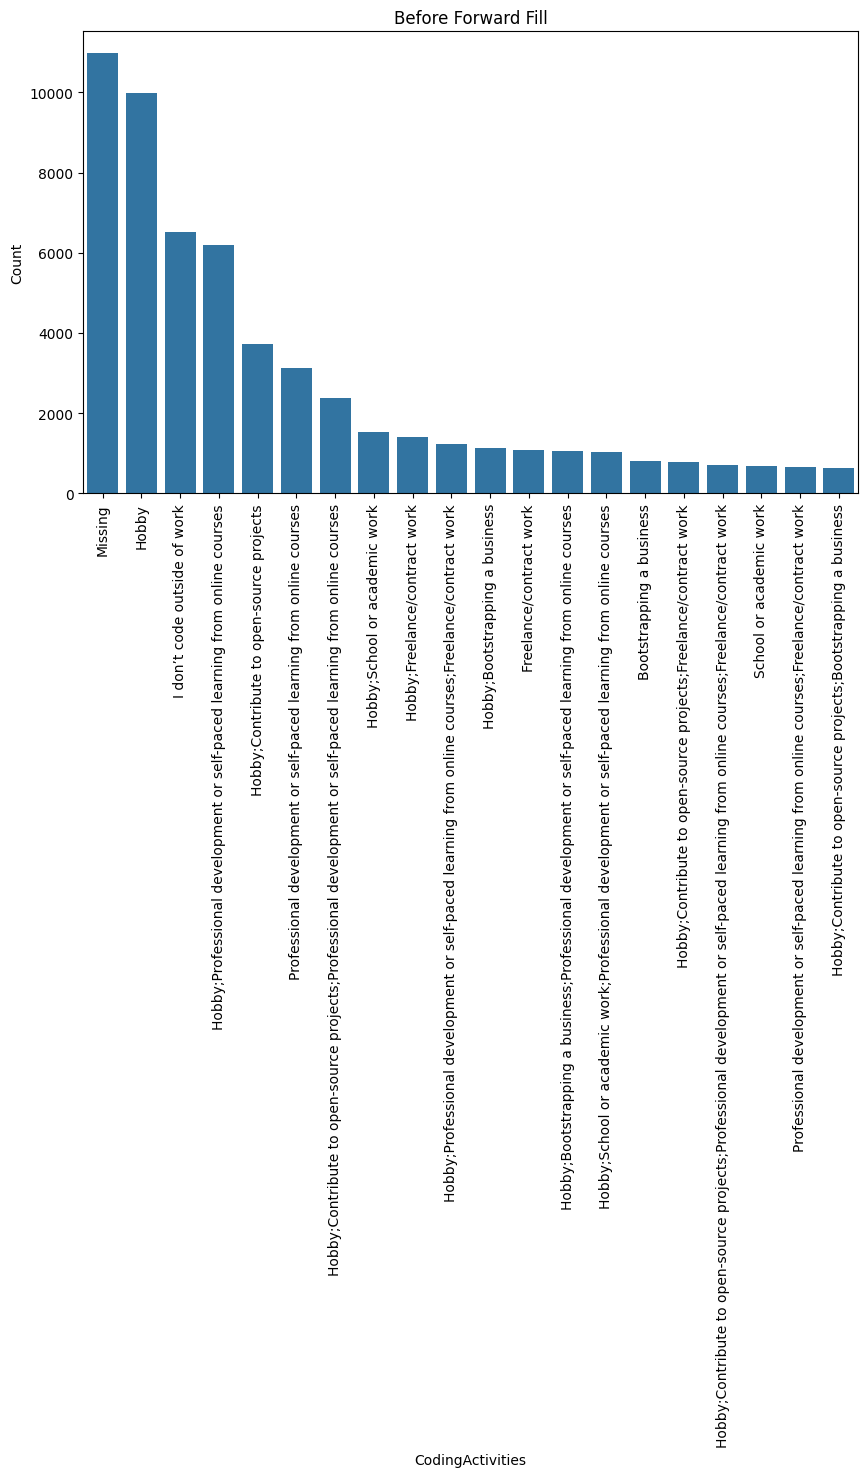

In [154]:
# Before applying ffill()
def getCAplot():
    ds = df["CodingActivities"].value_counts(dropna=False,ascending=False)
    # Convert the Series to a DataFrame for plotting
    ds_df = ds.reset_index()
    ds_df.columns = ['CodingActivities', 'Count'] 
    ds_df['CodingActivities'] = ds_df['CodingActivities'].fillna('Missing')
    print(ds_df)
    plt.figure(figsize=(10, 6))
    sns.barplot(x='CodingActivities', y='Count', data=ds_df.head(20))
    plt.title('Before Forward Fill')
    plt.xticks(rotation=90)
    plt.show()
getCAplot()

In [155]:
## Write your code here
#df['CodingActivities'] = df['CodingActivities'].astype(str)
df['CodingActivities']=df['CodingActivities'].ffill()
res=analyze_column_stats(df)
#df.method({col: value}, inplace=True)
display(HTML(create_html_display(res, selected_columns)))

                                      CodingActivities  Count
0                                                Hobby  11972
1                         I don’t code outside of work   7762
2    Hobby;Professional development or self-paced l...   7405
3             Hobby;Contribute to open-source projects   4469
4    Professional development or self-paced learnin...   3734
..                                                 ...    ...
113  Hobby;Contribute to open-source projects;Other...      1
114  Other (please specify):;Bootstrapping a busine...      1
115  Contribute to open-source projects;Other (plea...      1
116  Hobby;Contribute to open-source projects;Other...      1
117  Hobby;Other (please specify):;Bootstrapping a ...      1

[118 rows x 2 columns]


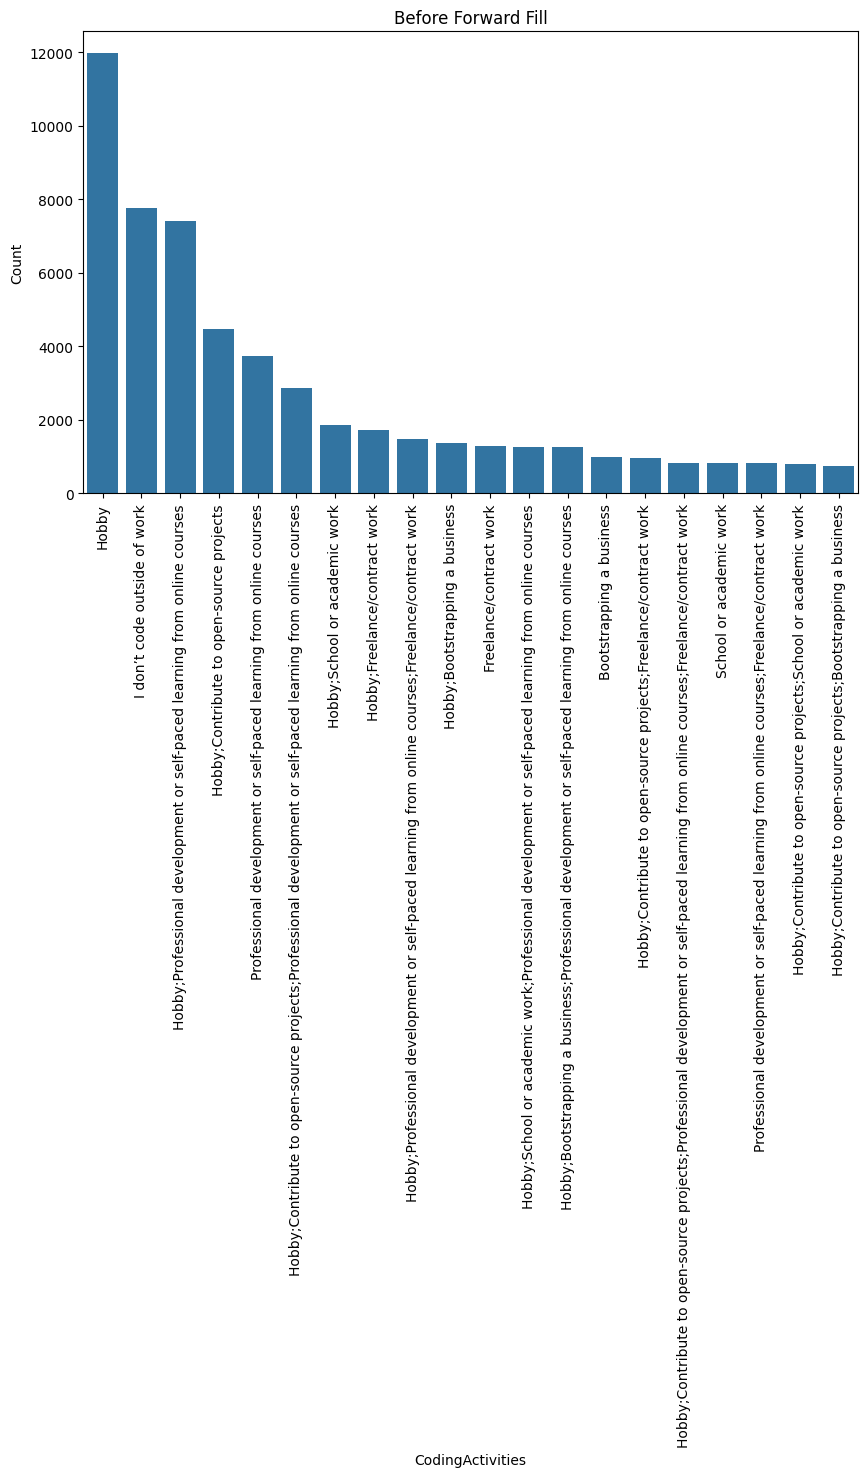

In [156]:
getCAplot()

### Section 3: Normalizing Compensation Data
##### Task 4: Identify compensation-related columns, such as ConvertedCompYearly.
Normalization is commonly applied to compensation data to bring values within a comparable range. Here, you’ll identify ConvertedCompYearly or similar columns, which contain compensation information. This column will be used in the subsequent tasks for normalization.


In [167]:
## Write your code here
# Example usage
columns_to_normalize = ['ConvertedCompYearly','CompTotal']
print(df[columns_to_normalize].max(),df[columns_to_normalize].min())
#normalized_df, norm_stats = normalize_numeric_data(df, columns_to_normalize, method='minmax')

ConvertedCompYearly     1.625660e+07
CompTotal              1.000000e+150
dtype: float64 ConvertedCompYearly    1.0
CompTotal              0.0
dtype: float64


##### Task 5: Normalize ConvertedCompYearly using Min-Max Scaling.
Min-Max Scaling brings all values in a column to a 0-1 range, making it useful for comparing data across different scales. Here, you will apply Min-Max normalization to the ConvertedCompYearly column, creating a new column ConvertedCompYearly_MinMax with normalized values.


In [168]:
## Write your code here
columns_to_normalize = ['ConvertedCompYearly']
minmax_normalized_df, norm_stats = normalize_numeric_data(df, columns_to_normalize, method='minmax')

##### Task 6: Apply Z-score Normalization to `ConvertedCompYearly`.

Z-score normalization standardizes values by converting them to a distribution with a mean of 0 and a standard deviation of 1. This method is helpful for datasets with a Gaussian (normal) distribution. Here, you’ll calculate Z-scores for the ConvertedCompYearly column, saving the results in a new column ConvertedCompYearly_Zscore.


In [169]:
## Write your code here
columns_to_normalize = ['ConvertedCompYearly']
zscore_normalized_df, norm_stats = normalize_numeric_data(df, columns_to_normalize, method='zscore')

### Section 4: Visualization of Normalized Data
##### Task 7: Visualize the distribution of `ConvertedCompYearly`, `ConvertedCompYearly_Normalized`, and `ConvertedCompYearly_Zscore`

Visualization helps you understand how normalization changes the data distribution. In this task, create histograms for the original ConvertedCompYearly, as well as its normalized versions (ConvertedCompYearly_MinMax and ConvertedCompYearly_Zscore). This will help you compare how each normalization technique affects the data range and distribution.


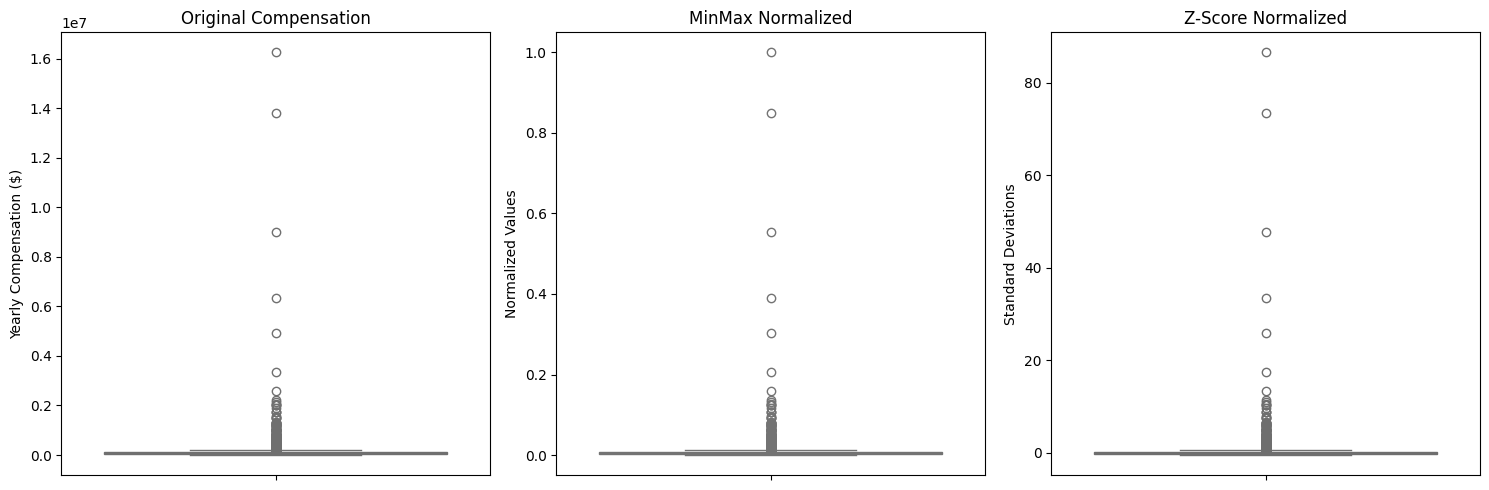

In [170]:
## Write your code here
# Create box plots for comparison
plt.figure(figsize=(15, 5))

# Original Distribution
plt.subplot(131)
sns.boxplot(y=df['ConvertedCompYearly'], color='skyblue')
plt.title('Original Compensation')
plt.ylabel('Yearly Compensation ($)')

# MinMax Normalized Distribution
plt.subplot(132)
sns.boxplot(y=minmax_normalized_df['ConvertedCompYearly'], color='lightgreen')
plt.title('MinMax Normalized')
plt.ylabel('Normalized Values')

# Z-Score Distribution
plt.subplot(133)
sns.boxplot(y=zscore_normalized_df['ConvertedCompYearly'], color='lightcoral')
plt.title('Z-Score Normalized')
plt.ylabel('Standard Deviations')

plt.tight_layout()
plt.show()

### Summary


In this lab, you practiced essential normalization techniques, including:

- Identifying and handling duplicate rows.

- Checking for and imputing missing values.

- Applying Min-Max scaling and Z-score normalization to compensation data.

- Visualizing the impact of normalization on data distribution.


Copyright © IBM Corporation. All rights reserved.
